In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def leer_archivo(nombre_archivo):
    """Lee el archivo y devuelve los datos estructurados"""
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()
    
    n, m = map(int, lineas[0].split())
    ids = lineas[1].strip().split()
    datos = np.array([list(map(float, linea.strip().split())) for linea in lineas[2:2+n]])
    
    return n, m, ids, datos

In [3]:
def analizar_correlaciones(datos, ids):
    """Realiza análisis completo de correlaciones espaciales y temporales"""
    # Correlación espacial (entre sensores)
    corr_espacial = np.corrcoef(datos)
    
    # Correlación temporal (autocorrelación con diferentes lags)
    lags = [1, 2, 5, 10]  # Lags temporales a analizar
    autocorrs = {f'Lag_{lag}': [] for lag in lags}
    
    for serie in datos:
        for lag in lags:
            if lag >= len(serie):
                autocorr = np.nan
            else:
                autocorr = np.corrcoef(serie[:-lag], serie[lag:])[0,1]
            autocorrs[f'Lag_{lag}'].append(autocorr)
    
    return corr_espacial, autocorrs

In [4]:
def visualizar_resultados(ids, corr_espacial, autocorrs):
    """Genera visualizaciones profesionales de los análisis"""
    plt.figure(figsize=(15, 6))
    
    # Heatmap de correlaciones espaciales
    plt.subplot(1, 2, 1)
    sns.heatmap(corr_espacial, annot=True, fmt=".2f", cmap='coolwarm',
                xticklabels=ids, yticklabels=ids)
    plt.title('Correlación Espacial entre Sensores')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Gráfico de autocorrelaciones temporales
    plt.subplot(1, 2, 2)
    for lag in autocorrs:
        sns.kdeplot(autocorrs[lag], label=lag, linewidth=2)
    plt.title('Distribución de Autocorrelaciones Temporales')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    
    plt.show()

In [5]:
def resumen_estadistico(corr_espacial, autocorrs):
    """Genera un resumen estadístico clave"""
    print("\n=== RESUMEN ESTADÍSTICO ===")
    
    # Estadísticas espaciales
    mascara = ~np.tri(corr_espacial.shape[0], dtype=bool)
    correlaciones = corr_espacial[mascara]
    
    print("\nCorrelación Espacial:")
    print(f"- Media: {np.nanmean(correlaciones):.3f}")
    print(f"- Mediana: {np.nanmedian(correlaciones):.3f}")
    print(f"- % > 0.7: {np.mean(correlaciones > 0.7)*100:.1f}%")
    
    # Estadísticas temporales
    print("\nAutocorrelación Temporal:")
    for lag in autocorrs:
        vals = np.array(autocorrs[lag])
        print(f"\n{lag}:")
        print(f"- Media: {np.nanmean(vals):.3f}")
        print(f"- % > 0.5: {np.mean(vals > 0.5)*100:.1f}%")

🔍 Analizando 240 sensores con 35136 muestras cada uno


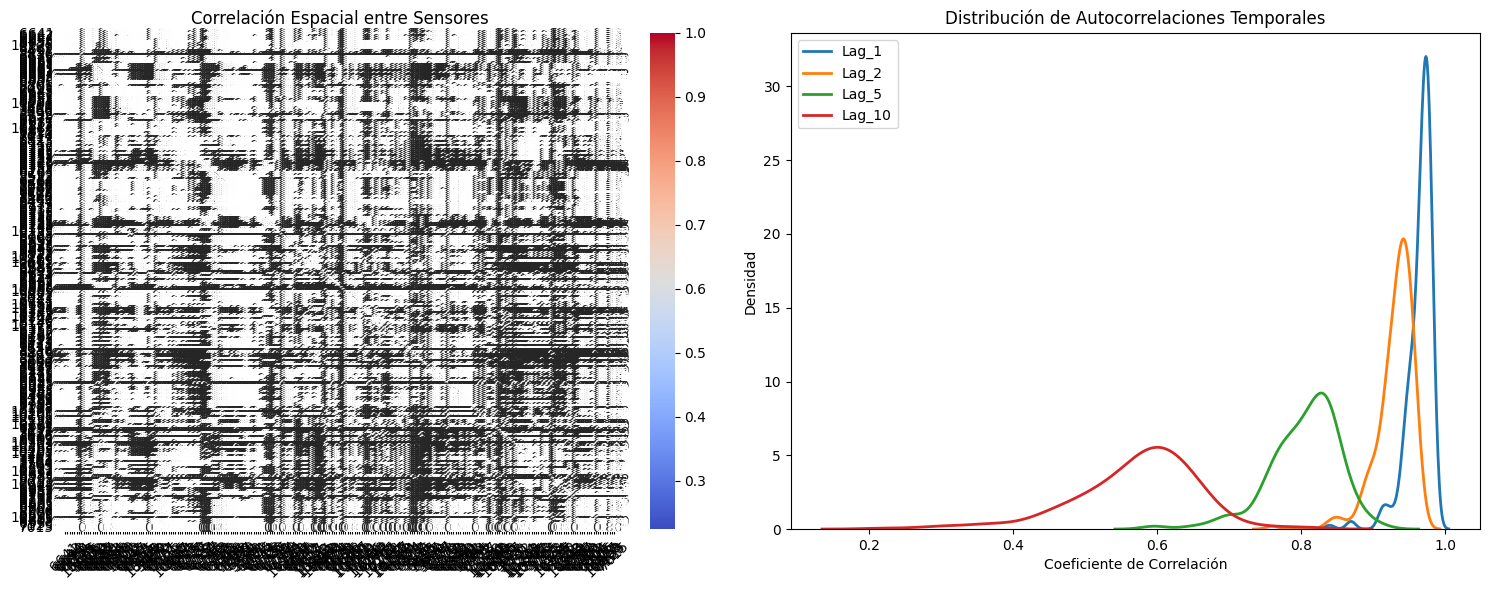


=== RESUMEN ESTADÍSTICO ===

Correlación Espacial:
- Media: 0.815
- Mediana: 0.834
- % > 0.7: 90.3%

Autocorrelación Temporal:

Lag_1:
- Media: 0.964
- % > 0.5: 100.0%

Lag_2:
- Media: 0.931
- % > 0.5: 100.0%

Lag_5:
- Media: 0.804
- % > 0.5: 100.0%

Lag_10:
- Media: 0.572
- % > 0.5: 82.9%


In [6]:
filename = "../procesa_archivos_2024/outputdata_m30_fulldates/archivos_articulo/m30_2024_data_fulldates_intensidad.txt"
n, m, ids, datos = leer_archivo(filename)
print(f"🔍 Analizando {n} sensores con {m} muestras cada uno")

corr_espacial, autocorrs = analizar_correlaciones(datos, ids)
visualizar_resultados(ids, corr_espacial, autocorrs)
resumen_estadistico(corr_espacial, autocorrs)